<a href="https://colab.research.google.com/github/qarni4126-ui/Ridg_Lasso_RFRegression_Project/blob/main/Ridg_Lasso_RFReg_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [2]:
df = fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
X = dataset
y=df.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)


In [23]:
print(X.shape)

(20640, 8)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

**By_using_Ridg_Regression_Model**

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridg_reg=Ridge()

In [10]:
parameters={'alpha':[1,2,4,8,10,12,14,16,18,20,30,40]}
ridgcv=GridSearchCV(ridg_reg,parameters,scoring='neg_mean_squared_error',cv=5)
ridgcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 4, 8, 10, 12, 14, 16, 18, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [11]:
print(ridgcv.best_score_)

-0.5268179681302121


In [12]:
ridg_prid=ridgcv.predict(X_test)

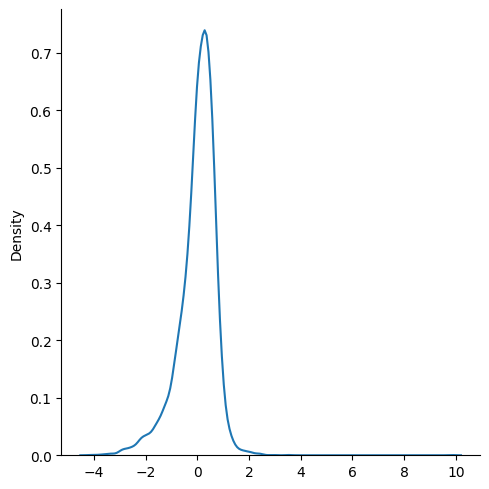

In [13]:
sns.displot(ridg_prid-y_test,kind = 'kde')

In [14]:
from sklearn.metrics import r2_score
score = r2_score(y_test,ridg_prid)
score

0.5959109458974566

**By_using_Lasso_Regression_Model**

In [15]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(max_iter=1000)

In [16]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10,20,50,100]}
lassocv=GridSearchCV(lasso_reg,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50,
                                   100]},
             scoring='neg_mean_squared_error')

In [17]:
lasso_prid=lassocv.predict(X_test)

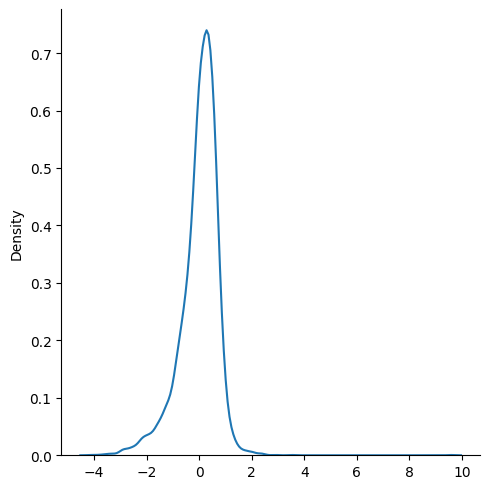

In [18]:
sns.displot(lasso_prid-y_test,kind = 'kde')

In [19]:
score = r2_score(y_test,lasso_prid)
score

0.5963975777208825

**By_using_Random_Forest_Regression_Model**

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

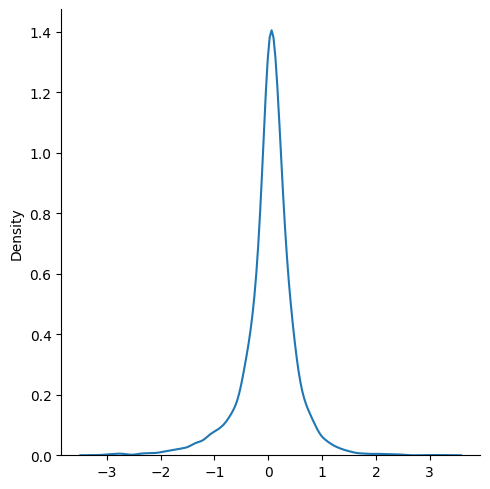

In [25]:
y_pred_rf = rf.predict(X_test)
sns.displot(y_pred_rf-y_test,kind = 'kde')

In [26]:
score=r2_score(y_test, y_pred_rf)
score

0.8066582178264476